In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory,to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split


In [13]:
def load_data(dir,img_size=(32,32)):
    data=image_dataset_from_directory(dir,image_size=img_size)
    images,labels=[],[]
    for x,y in data:
        images.append(x.numpy().astype('float32'))
        labels.append(y.numpy())
    X=np.concatenate(images)/255.0
    Y=np.concatenate(labels)
    Y=to_categorical(Y,10)
    return X,Y

In [14]:
X,Y=load_data("D:\\Source_code\\Lab\\data\\cifar10\\train")

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=42,stratify=Y,test_size=0.2)

Found 50000 files belonging to 10 classes.


In [21]:
model=Sequential([
    Conv2D(128,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
log=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.3818 - loss: 1.6681 - val_accuracy: 0.5087 - val_loss: 1.3641
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.5419 - loss: 1.2759 - val_accuracy: 0.5921 - val_loss: 1.1581
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6037 - loss: 1.1156 - val_accuracy: 0.6210 - val_loss: 1.0857
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6413 - loss: 1.0185 - val_accuracy: 0.6160 - val_loss: 1.1128
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6707 - loss: 0.9328 - val_accuracy: 0.6636 - val_loss: 0.9747


C:\Users\luzif\AppData\Local\Temp\ipykernel_13292\2482958959.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


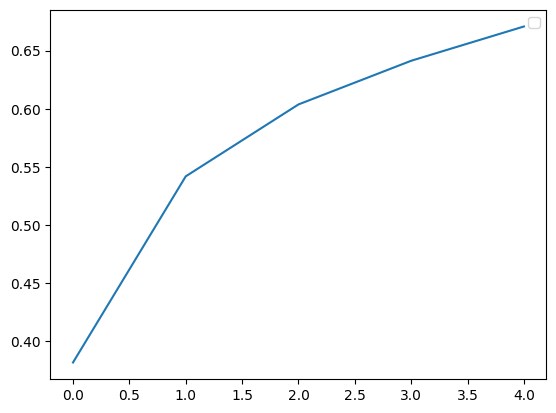

In [23]:

plt.plot(log.history['accuracy'])
plt.legend()
plt.show()